#                                                Mice Protein Classification Project

In [1]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Load Dataset of Mice's Protiens & other Features

In [2]:
file_path = r"C:\Users\asus\Downloads\Evoastra\Final Mice Classification\Data_Cortex_Nuclear.csv"
data = pd.read_csv(file_path)
data.head(5)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
if 'MouseID' in data.columns:
    data = data.drop('MouseID', axis=1)

# Dataset Summary

In [4]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [6]:
data.isnull().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [7]:
missing_count_percent = data.isnull().mean()*100
print(missing_count_percent)

DYRK1A_N     0.277778
ITSN1_N      0.277778
BDNF_N       0.277778
NR1_N        0.277778
NR2A_N       0.277778
               ...   
CaNA_N       0.000000
Genotype     0.000000
Treatment    0.000000
Behavior     0.000000
class        0.000000
Length: 81, dtype: float64


# Exploratory Data Analysis

In [8]:
class_distribution = data['class'].value_counts()
print(class_distribution)

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64


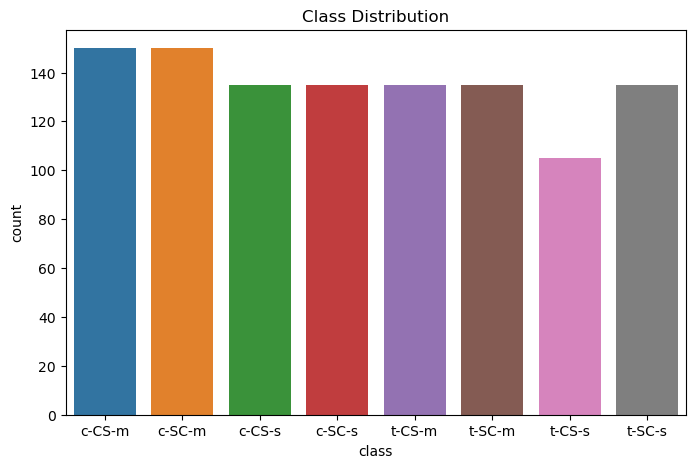

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.savefig("class_distribution.png")
plt.show()

# Checking Protien's Distribution

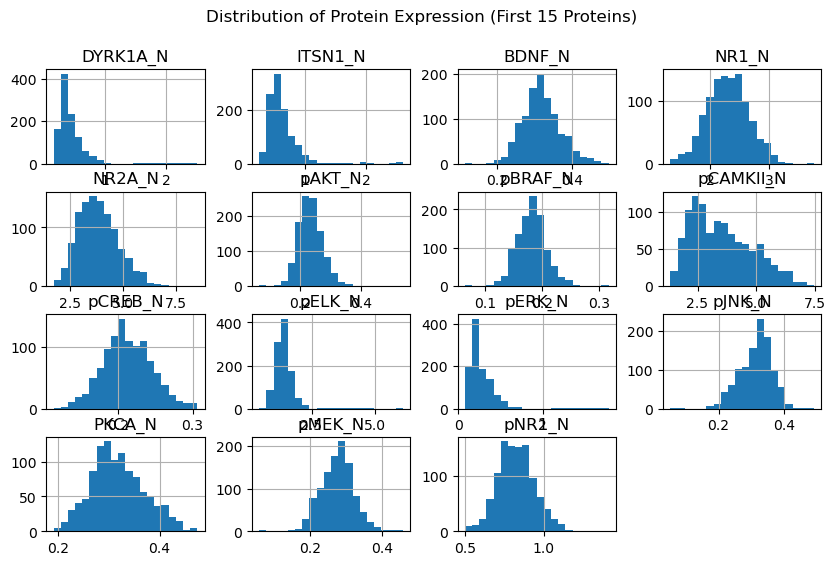

In [10]:
data.iloc[:, 0:15].hist(bins=20, figsize=(10, 6))
plt.suptitle("Distribution of Protein Expression (First 15 Proteins)")
plt.show()

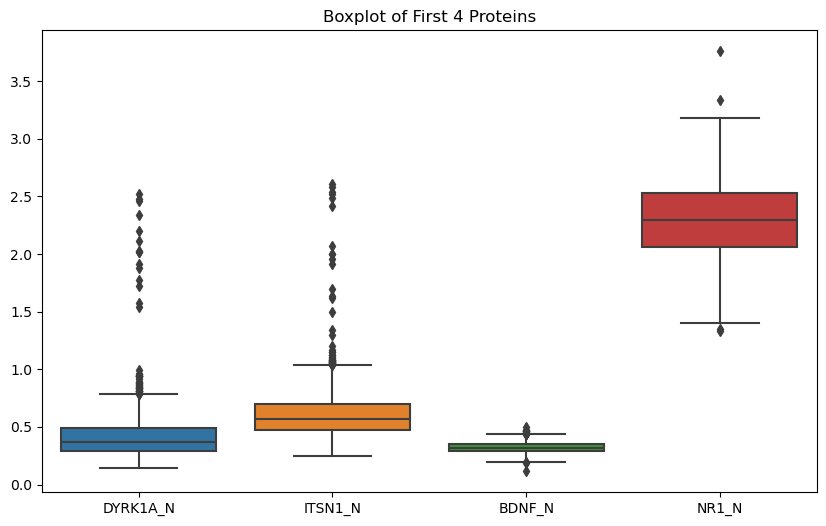

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:,0:4])
plt.title("Boxplot of First 4 Proteins")
plt.show()

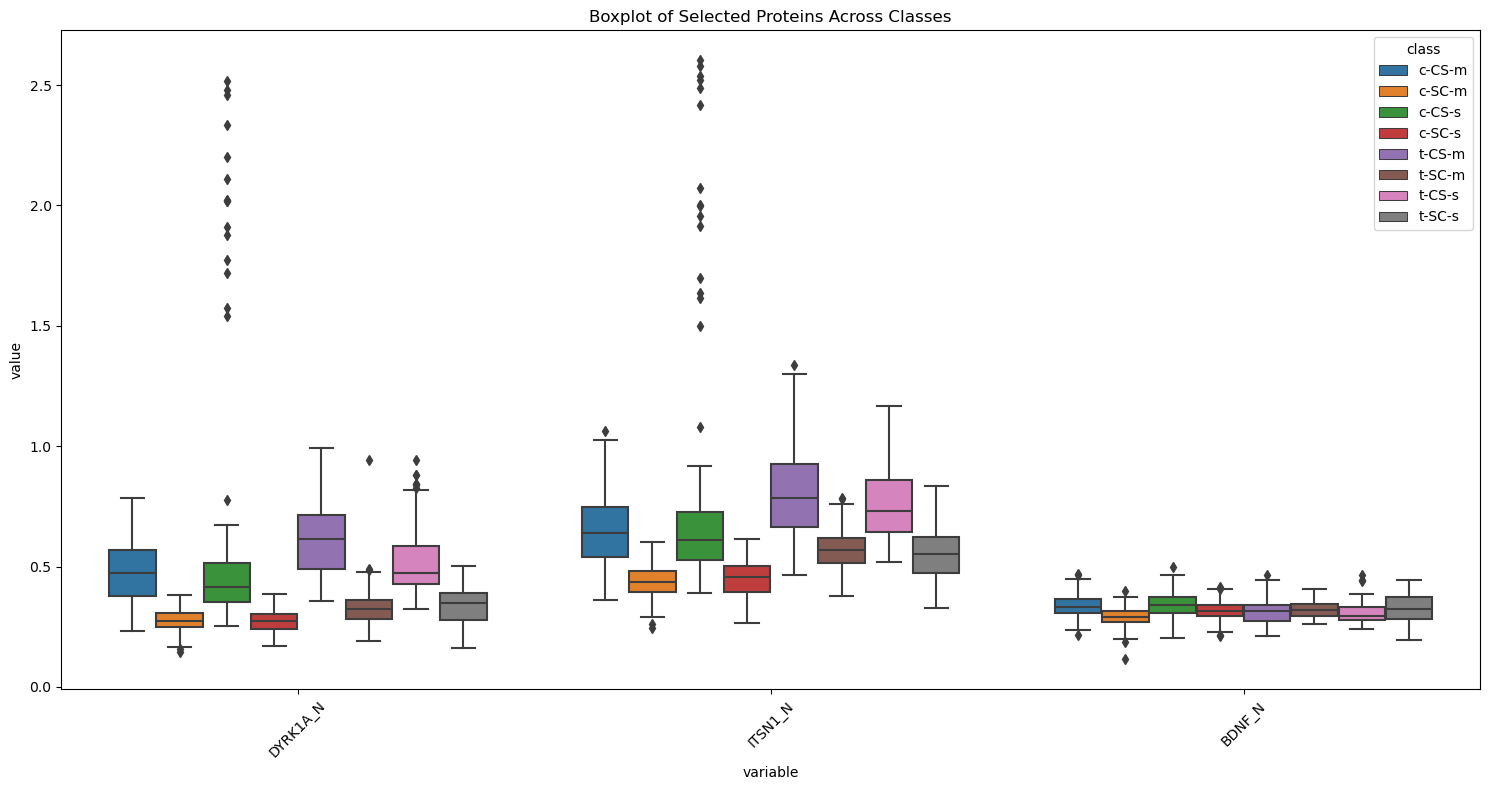

In [12]:
selected_proteins = data.columns[:3]  # First 3 proteins
plt.figure(figsize=(15, 8))
df_melted = data.melt(id_vars='class', value_vars=selected_proteins)
sns.boxplot(data=df_melted, x='variable', y='value', hue='class')
plt.title('Boxplot of Selected Proteins Across Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handling Missing values

In [13]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
print(data.isnull().sum().sum())

0


# Encode categorical variables

In [14]:
categorical_cols = ['Genotype', 'Treatment', 'Behavior']
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

In [15]:
# Encode target
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

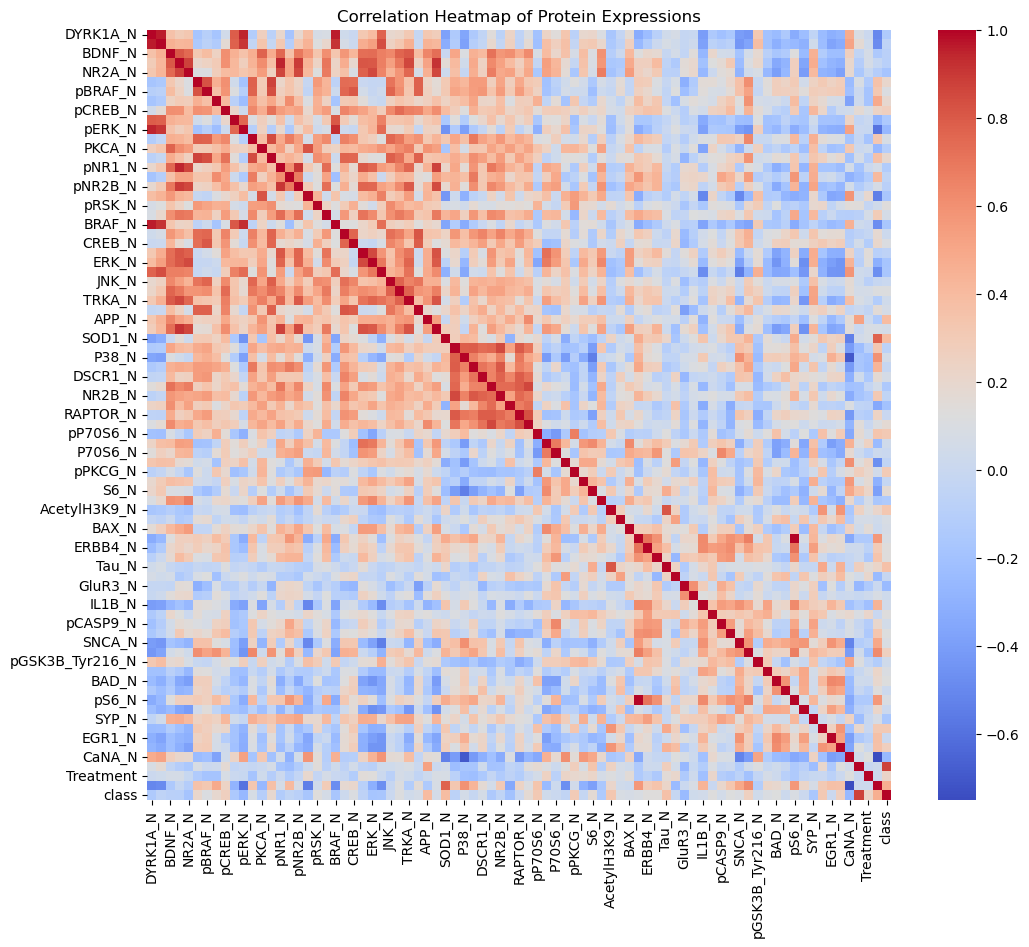

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.iloc[:,0:].corr(), cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Protein Expressions")
plt.show()

# Handling Outliers

In [17]:
from scipy import stats
numerical_cols = data.select_dtypes(include=['number']).columns
for column in numerical_cols:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 3
    outlier_count = (z_scores > threshold).sum()
    print(f"Number of outliers in {column}: {outlier_count}")

Number of outliers in DYRK1A_N: 15
Number of outliers in ITSN1_N: 15
Number of outliers in BDNF_N: 3
Number of outliers in NR1_N: 2
Number of outliers in NR2A_N: 4
Number of outliers in pAKT_N: 9
Number of outliers in pBRAF_N: 8
Number of outliers in pCAMKII_N: 1
Number of outliers in pCREB_N: 1
Number of outliers in pELK_N: 20
Number of outliers in pERK_N: 14
Number of outliers in pJNK_N: 7
Number of outliers in PKCA_N: 0
Number of outliers in pMEK_N: 8
Number of outliers in pNR1_N: 3
Number of outliers in pNR2A_N: 5
Number of outliers in pNR2B_N: 5
Number of outliers in pPKCAB_N: 1
Number of outliers in pRSK_N: 7
Number of outliers in AKT_N: 4
Number of outliers in BRAF_N: 15
Number of outliers in CAMKII_N: 7
Number of outliers in CREB_N: 7
Number of outliers in ELK_N: 15
Number of outliers in ERK_N: 5
Number of outliers in GSK3B_N: 16
Number of outliers in JNK_N: 8
Number of outliers in MEK_N: 3
Number of outliers in TRKA_N: 3
Number of outliers in RSK_N: 8
Number of outliers in APP

In [18]:
Q1 = data.iloc[:,0:77].quantile(0.25)
Q3 = data.iloc[:,0:77].quantile(0.75)
IQR = Q3 - Q1
data.iloc[:,0:77] = data.iloc[:,0:77][~((data.iloc[:,0:77] < (Q1 - 1.5 * IQR)) | (data.iloc[:,0:77] > (Q3 + 1.5 * IQR)))]
data.fillna(data.median(numeric_only=True), inplace=True)

In [19]:
data.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0,0,0
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,0,0,0,0
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,0,0,0,0
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,0,0,0,0
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,0,0,0,0
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,0,0,0,0


# Features Selection

In [20]:
feature_cols = [col for col in data.columns if col not in ['class']]
X = data[feature_cols]
y = data['class']

# Remove highly correlated features

In [21]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col] > 0.95)]
if high_corr:
    X = X.drop(columns=high_corr)

In [22]:
# Select best features
selector = SelectKBest(f_classif, k=min(50, X.shape[1]))
X_selected = selector.fit_transform(X, y)
selected_features = [feature_cols[i] for i in selector.get_support(indices=True)]

# Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [25]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


Model: Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



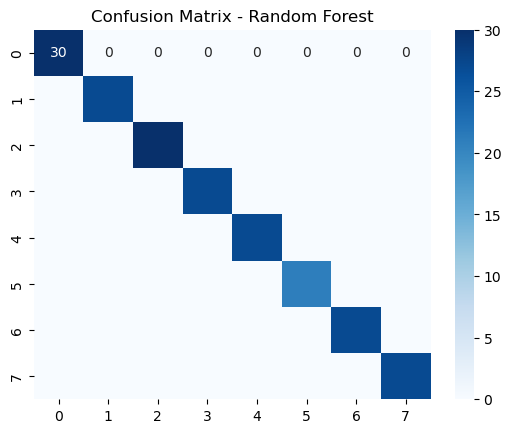


Model: Logistic Regression
Accuracy: 0.9953703703703703
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



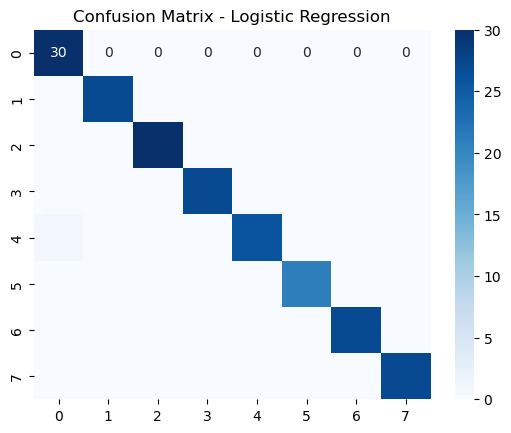


Model: K-Nearest Neighbors
Accuracy: 0.9814814814814815
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27
           4       1.00      0.89      0.94        27
           5       1.00      0.95      0.98        21
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        27

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



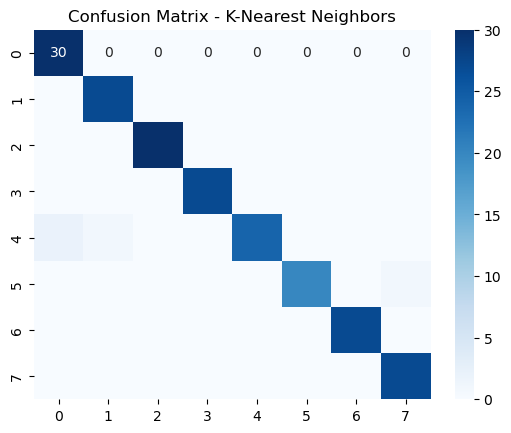


Model: Decision Tree
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



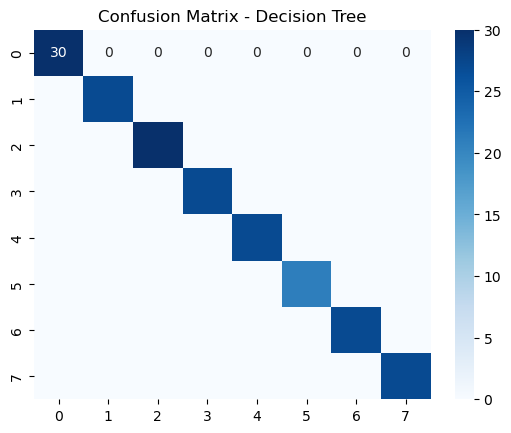

In [26]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.savefig(f"confusion_matrix_{name}.png")
    plt.show()

# Parameter grid for Hypertunning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=models["K-Nearest Neighbors"], param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train KNN with best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

# Model Evaluation

In [28]:
y_pred = best_knn.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9953703703703703

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.96      0.98        27
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        27

    accuracy                           1.00       216
   macro avg       0.99      1.00      0.99       216
weighted avg       1.00      1.00      1.00       216



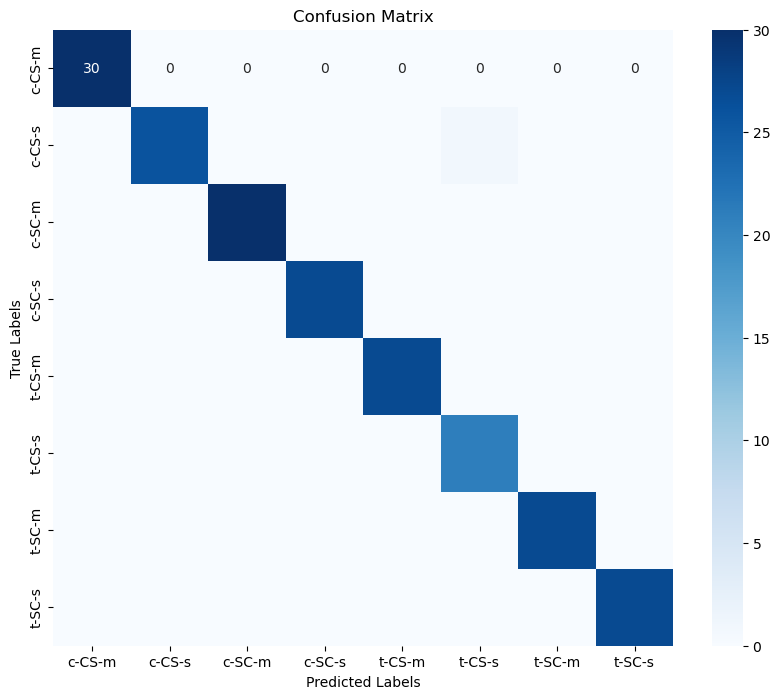

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
y_pred

array([4, 4, 2, 1, 0, 0, 5, 4, 0, 0, 7, 5, 2, 6, 6, 7, 1, 0, 0, 7, 2, 5,
       3, 6, 3, 6, 1, 2, 6, 6, 0, 0, 3, 0, 3, 6, 3, 1, 5, 7, 7, 5, 0, 6,
       5, 5, 5, 5, 7, 3, 0, 3, 2, 6, 2, 1, 6, 5, 6, 7, 5, 5, 7, 0, 5, 7,
       3, 4, 4, 0, 0, 6, 4, 2, 4, 0, 7, 7, 7, 4, 2, 3, 0, 7, 3, 4, 2, 0,
       5, 4, 2, 1, 3, 4, 6, 2, 0, 4, 2, 3, 7, 0, 3, 0, 6, 3, 2, 2, 4, 4,
       2, 7, 0, 6, 4, 1, 7, 2, 2, 2, 7, 5, 2, 3, 2, 3, 7, 6, 1, 5, 1, 6,
       1, 1, 3, 2, 7, 3, 1, 4, 6, 6, 5, 1, 1, 2, 0, 3, 3, 5, 4, 2, 7, 6,
       4, 7, 1, 1, 6, 4, 6, 2, 1, 5, 1, 6, 1, 4, 1, 6, 0, 5, 2, 2, 1, 4,
       7, 0, 0, 7, 1, 4, 2, 3, 5, 3, 4, 3, 5, 1, 1, 4, 1, 7, 6, 6, 3, 4,
       0, 4, 2, 1, 7, 7, 6, 0, 0, 4, 0, 3, 3, 2, 0, 3, 7, 2])

# Top 5 Important protein features

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

X_train = pd.DataFrame(X_train_scaled, columns=data.columns[0:50])

# Apply SelectKBest to extract top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train_scaled, y_train)

# Get selected feature indices
top_indices = selector.get_support(indices=True)

# Convert indices to a list (to ensure it's 1D) and access original feature names
top_features = [X_train.columns[i] for i in top_indices]

# Display top features
print("Top 5 Most Important Features (using ANOVA F-test):")
for feature in top_features:
    print(feature)


Top 5 Most Important Features (using ANOVA F-test):
pBRAF_N
pPKCAB_N
NUMB_N
pPKCG_N
ADARB1_N


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
f_scores = selector.scores_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': f_scores
})

# Sort the DataFrame by F-score in descending order
feature_importance = feature_importance.sort_values(by='F_Score', ascending=False)


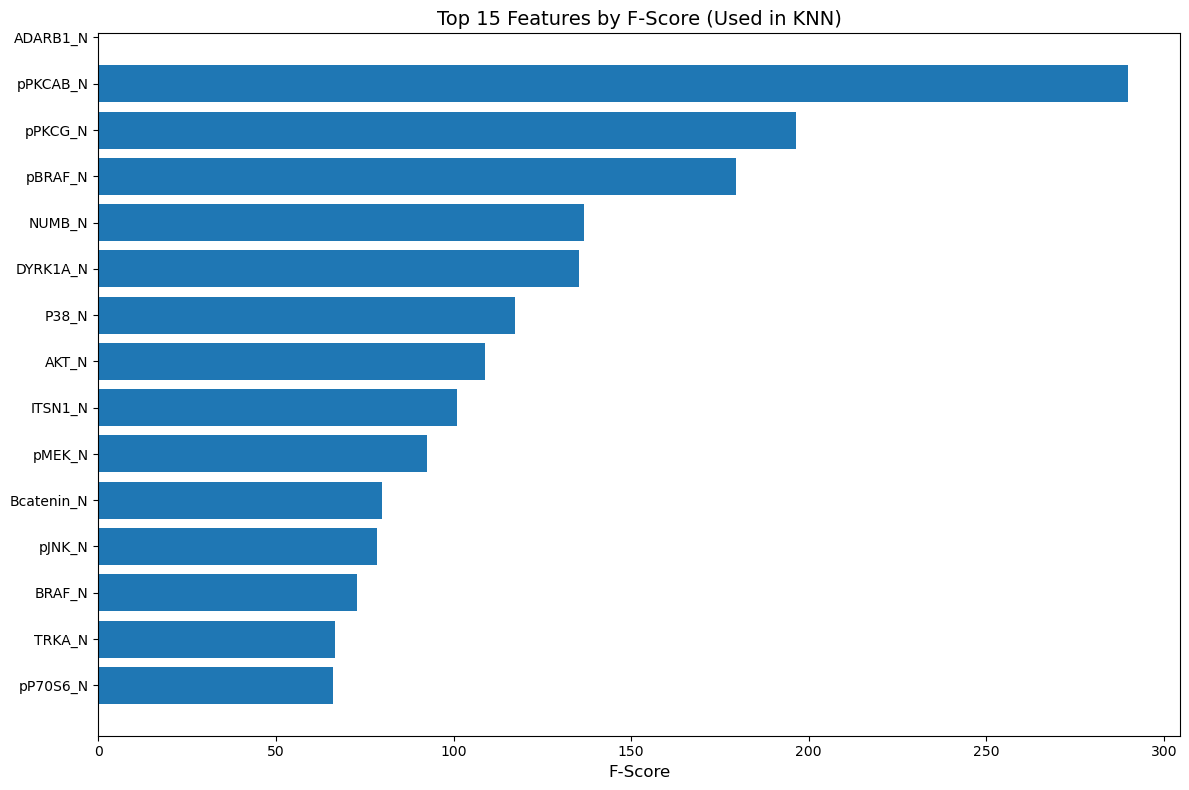

In [33]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:15], feature_importance['F_Score'][:15])
plt.title('Top 15 Features by F-Score (Used in KNN)', fontsize=14)
plt.xlabel('F-Score', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()  # Optional: prevents label clipping
plt.show()

# Model Saving for future Deployment

In [34]:
import joblib

# Save the model, scaler, and label encoder
joblib.dump(best_knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(top_features, "top_features.pkl")  # Save top 5 selected features

['top_features.pkl']